In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import gc
import joblib


In [2]:
df = pd.read_csv('../Data/WindSpeed/wind_dataset.csv')
df.head(3)

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     6574 non-null   object 
 1   WIND     6574 non-null   float64
 2   IND      6574 non-null   int64  
 3   RAIN     6574 non-null   float64
 4   IND.1    6513 non-null   float64
 5   T.MAX    5953 non-null   float64
 6   IND.2    6513 non-null   float64
 7   T.MIN    5900 non-null   float64
 8   T.MIN.G  6214 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 462.4+ KB


In [4]:
df.describe()

,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
count,6574.000000,6574.000000,6574.000000,6513.000000,5953.000000,6513.000000,5900.000000,6214.000000
mean,9.796834,0.391542,1.885169,0.356364,13.339123,0.464456,6.411678,2.736547
std,4.977272,1.179092,4.030529,1.128552,4.890546,1.177571,4.637243,5.569175
min,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,-11.500000,-14.400000
25%,6.000000,0.000000,0.000000,0.000000,9.600000,0.000000,3.000000,-1.000000
50%,9.210000,0.000000,0.200000,0.000000,13.300000,0.000000,6.500000,3.000000
75%,12.960000,0.000000,2.000000,0.000000,17.200000,0.000000,10.000000,7.000000
max,30.370000,4.000000,67.000000,4.000000,26.800000,4.000000,18.000000,15.800000


In [5]:
df.DATE = pd.to_datetime(df.DATE, format='%Y/%m/%d')

In [6]:
df.nunique()

DATE       6574
WIND        580
IND           3
RAIN        226
IND.1         4
T.MAX       246
IND.2         5
T.MIN       247
T.MIN.G     283
dtype: int64

#### Observation;
IND, IND.1 &, IND.2 Appear to be some sort of categorical. We'll leave them for now and evaluate them in a correlation matrix to determine OneHot vs. Ordinal

## Splitting Data

In [7]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(
    df, test_size=0.2, random_state=7)
X_train, y_train = train_set.drop(['WIND'], axis=1), train_set.iloc[:, 1]

## Missing Values

In [8]:
mask = X_train.isna().T.any()
print(f'NA Counts:\n{X_train.isna().sum()}')
X_train[mask]

NA Counts:
DATE         0
IND          0
RAIN         0
IND.1       52
T.MAX      494
IND.2       52
T.MIN      536
T.MIN.G    293
dtype: int64


,DATE,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
742,1963-01-13,0,0.0,4.0,NaN,4.0,NaN,-13.0
3675,1971-01-24,0,0.4,0.0,10.2,4.0,NaN,0.3
1955,1966-05-10,0,1.1,NaN,NaN,NaN,NaN,NaN
1731,1965-09-28,0,0.0,4.0,NaN,4.0,NaN,-2.0
1536,1965-03-17,0,0.6,4.0,NaN,4.0,NaN,2.1
...,...,...,...,...,...,...,...,...
1728,1965-09-25,4,0.0,4.0,NaN,4.0,NaN,10.0
772,1963-02-12,0,0.0,4.0,NaN,4.0,NaN,-0.1
3896,1971-09-02,0,2.8,0.0,20.0,0.0,9.1,NaN
1092,1963-12-29,0,1.5,4.0,NaN,4.0,NaN,5.0


## Data Visualization

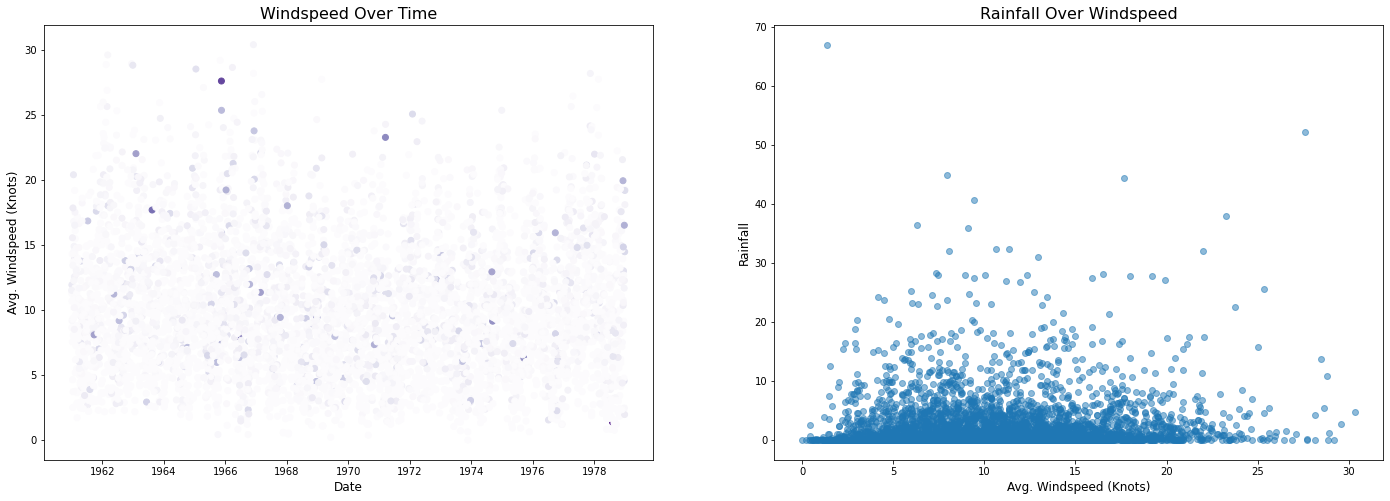

In [9]:
fig, axs = plt.subplots(1,2, figsize=(24, 8))
axs[0].scatter(train_set['DATE'], train_set['WIND'], cmap='Purples', c=train_set['RAIN'])
axs[0].set_title('Windspeed Over Time', fontsize=16)
axs[0].set_ylabel('Avg. Windspeed (Knots)', fontsize=12)
axs[0].set_xlabel('Date', fontsize=12)
plt.scatter(train_set['WIND'], train_set['RAIN'], alpha=0.5)
axs[1].set_title('Rainfall Over Windspeed', fontsize=16)
axs[1].set_ylabel('Rainfall', fontsize=12)
axs[1].set_xlabel('Avg. Windspeed (Knots)', fontsize=12)
plt.show()

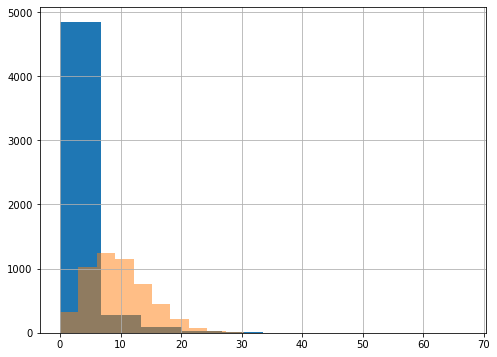

In [10]:
train_set['RAIN'].hist(figsize=(8,6))
train_set['WIND'].hist(alpha=0.5)
plt.show()

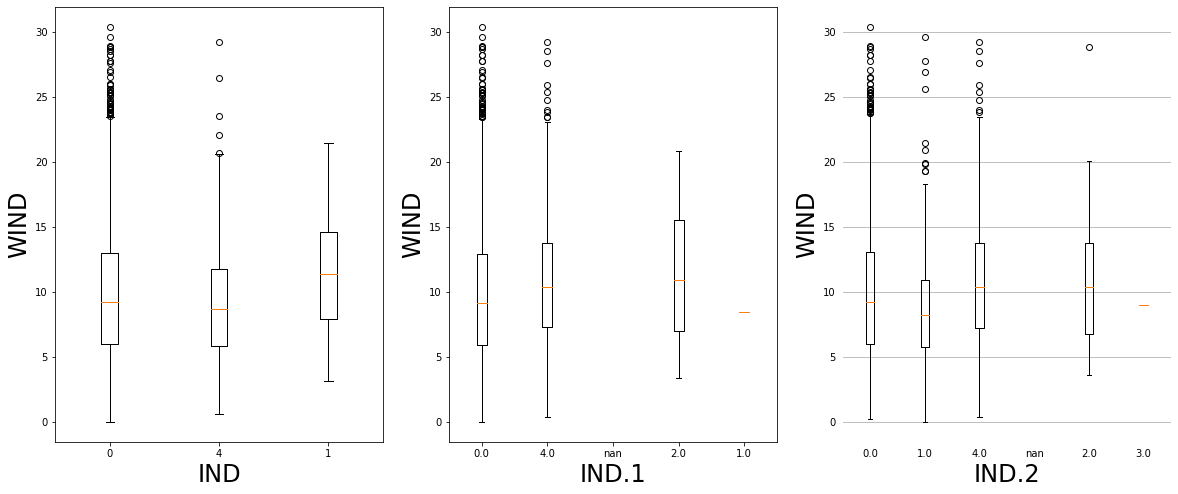

In [11]:
fig, axs = plt.subplots(1,3, figsize=(20,8))
for idx, i in enumerate(list(train_set['IND'].drop_duplicates())):
    axs[0].boxplot(train_set[train_set['IND']==i]['WIND'], positions=[idx], labels=[i])
    axs[0].set_xlabel('IND', fontsize=24)
    axs[0].set_ylabel('WIND', fontsize=24)
for idx, i in enumerate(list(train_set['IND.1'].drop_duplicates())):
    axs[1].boxplot(train_set[train_set['IND.1']==i]['WIND'], positions=[idx], labels=[i])
    axs[1].set_xlabel('IND.1', fontsize=24)
    axs[1].set_ylabel('WIND', fontsize=24)
for idx, i in enumerate(list(train_set['IND.2'].drop_duplicates())):
    axs[2].boxplot(train_set[train_set['IND.2']==i]['WIND'], positions=[idx], labels=[i])
    axs[2].set_xlabel('IND.2', fontsize=24)
    axs[2].set_ylabel('WIND', fontsize=24)
plt.grid(axis='y')
plt.box(False)
plt.tick_params(left=False, bottom=False)
plt.show()

In [12]:

# fig, axs = plt.subplots(1,3, figsize=(20,8))
# for idx, i in enumerate(list(train_set['IND'].drop_duplicates().dropna())):
#     axs[0].violinplot(train_set[train_set['IND']==i]['WIND'], positions=[idx])
#     axs[0].set_xticks(list(train_set['IND'].unique()),labels=list(train_set['IND'].unique()))
#     axs[0].set_xlabel('IND', fontsize=24)
#     axs[0].set_ylabel('WIND', fontsize=24)
# for idx, i in enumerate(list(train_set['IND.1'].drop_duplicates().dropna())):
#     axs[1].violinplot(train_set[train_set['IND.1']==i]['WIND'], positions=[idx])
#     axs[1].set_xticks(list(train_set['IND.1'].unique()),labels=list(train_set['IND.1'].unique()))
#     axs[1].set_xlabel('IND.1', fontsize=24)
#     axs[1].set_ylabel('WIND', fontsize=24)
# for idx, i in enumerate(list(train_set['IND.2'].drop_duplicates().dropna())):
#     axs[2].violinplot(train_set[train_set['IND.2']==i]['WIND'], positions=[idx])
#     axs[2].set_xticks(list(train_set['IND.2'].unique()),labels=list(train_set['IND.2'].unique()))
#     axs[2].set_xlabel('IND.2', fontsize=24)
#     axs[2].set_ylabel('WIND', fontsize=24)
# plt.grid(axis='y')
# plt.box(False)
# plt.tick_params(left=False, bottom=False)
# plt.show()

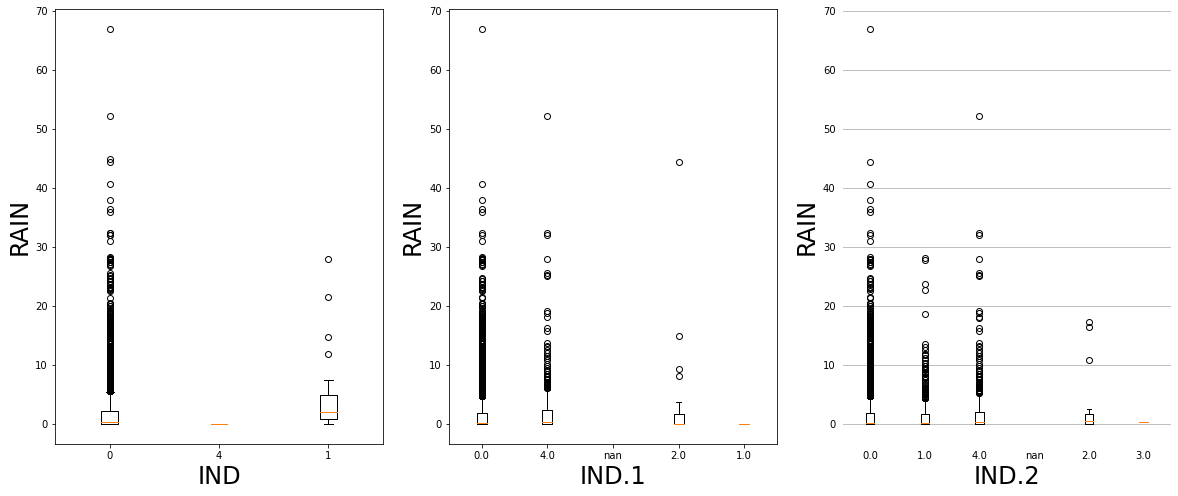

In [13]:
fig, axs = plt.subplots(1,3, figsize=(20,8))
for idx, i in enumerate(list(train_set['IND'].drop_duplicates())):
    axs[0].boxplot(train_set[train_set['IND']==i]['RAIN'], positions=[idx], labels=[i])
    axs[0].set_xlabel('IND', fontsize=24)
    axs[0].set_ylabel('RAIN', fontsize=24)
for idx, i in enumerate(list(train_set['IND.1'].drop_duplicates())):
    axs[1].boxplot(train_set[train_set['IND.1']==i]['RAIN'], positions=[idx], labels=[i])
    axs[1].set_xlabel('IND.1', fontsize=24)
    axs[1].set_ylabel('RAIN', fontsize=24)

for idx, i in enumerate(list(train_set['IND.2'].drop_duplicates())):
    axs[2].boxplot(train_set[train_set['IND.2']==i]['RAIN'], positions=[idx], labels=[i])
    axs[2].set_xlabel('IND.2', fontsize=24)
    axs[2].set_ylabel('RAIN', fontsize=24)
plt.grid(axis='y')
plt.box(False)
plt.tick_params(left=False, bottom=False)
plt.show()

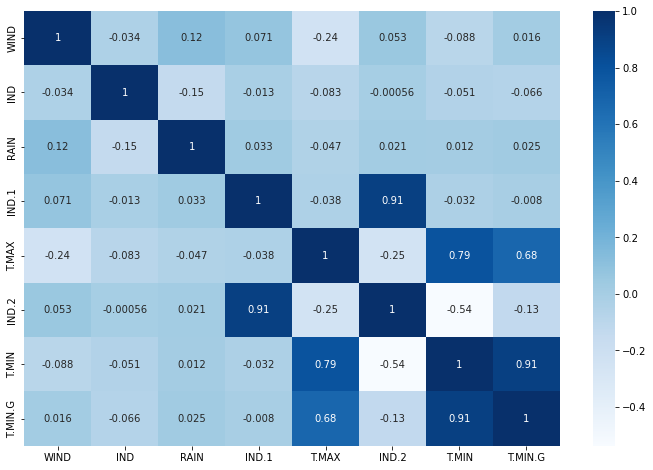

In [14]:
corr_matrix = train_set.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.show()

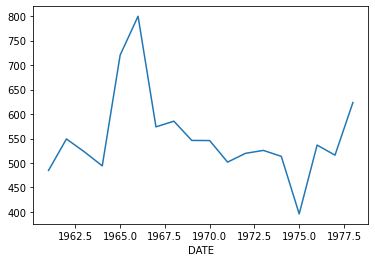

In [15]:
X_train.groupby(X_train.DATE.dt.year)['RAIN'].agg('sum').plot()
plt.show()

In [16]:
total_rainfall = X_train.groupby(X_train.DATE.dt.year)['RAIN'].agg('sum').sort_values()

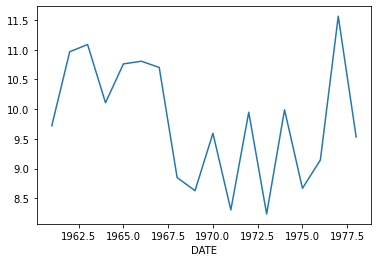

In [17]:
train_set.groupby(train_set.DATE.dt.year)['WIND'].agg('mean').plot()
plt.show()

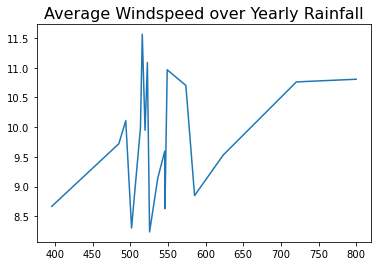

In [18]:
_ = pd.DataFrame([train_set.groupby(train_set.DATE.dt.year)['WIND'].agg('mean'), total_rainfall]).T.sort_values('RAIN')
plt.plot(_['RAIN'], _['WIND'])
plt.title('Average Windspeed over Yearly Rainfall', fontsize=16)
plt.show()

# Pipeline

In [19]:
cat_list = ['IND', 'IND.1', 'IND.2']
num_list = ['RAIN', 'T.MAX', 'T.MIN', 'T.MIN.G']

In [20]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import make_column_selector, make_column_transformer

cat_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore')
)
num_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    MinMaxScaler()
)
preprocessing = ColumnTransformer([
    ('cat', cat_pipeline, cat_list),
    ('num', num_pipeline, num_list),
], remainder='drop')

## Helper Functions

# First Model Runthroughs

## SGD

In [21]:
from sklearn.linear_model import SGDRegressor
sgd_reg = make_pipeline(preprocessing, SGDRegressor(random_state=7))
sgd_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['IND', 'IND.1', 'IND.2']),
                                                 ('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['RAIN', 'T.MAX', 'T.MIN',
                                                   'T.MIN.G'])])),
                ('sgdregressor', SGDRegressor(random_state=7))])

In [22]:
from sklearn.model_selection import cross_val_score
-cross_val_score(sgd_reg, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

array([3.79671671, 3.65187991, 3.74255386, 3.78417437, 3.71933814])

In [23]:
_ = pd.DataFrame(sgd_reg.predict(X_train))
_.join(y_train.reset_index(drop=True))

,0,WIND
0,10.663144,15.92
1,10.510433,20.08
2,7.631529,10.21
3,9.796536,5.91
4,7.910482,5.21
...,...,...
5254,6.903071,1.67
5255,11.056100,10.08
5256,8.938106,13.67
5257,9.675058,15.54


## DecisionTree

In [24]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=7))
tree_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['IND', 'IND.1', 'IND.2']),
                                                 ('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['RAIN', 'T.MAX', 'T.MIN',
                                                   'T.MIN.G'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=7))])

In [25]:
tree_predictions = tree_reg.predict(X_train)
tree_mse =  -cross_val_score(tree_reg, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
tree_mse

array([4.99118726, 4.97020913, 4.84071198, 5.1656452 , 4.99182525])

## RForest

In [26]:
from sklearn.ensemble import RandomForestRegressor
rforest_reg = make_pipeline(preprocessing, RandomForestRegressor())
rforest_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['IND', 'IND.1', 'IND.2']),
                                                 ('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['RAIN', 'T.MAX', 'T.MIN',
                                                   'T.MIN.G'])])),
                ('randomforestregressor', RandomForestRegressor())])

In [27]:
tree_mse = -cross_val_score(rforest_reg, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
tree_mse

array([3.79106845, 3.67022271, 3.56739833, 3.80166931, 3.64154675])

In [28]:
rforest_predictions = pd.DataFrame(rforest_reg.predict(X_train))
rforest_predictions.join(y_train.reset_index(drop=True))

,0,WIND
0,12.7422,15.92
1,18.1878,20.08
2,12.1435,10.21
3,6.7418,5.91
4,5.0915,5.21
...,...,...
5254,2.5552,1.67
5255,11.6614,10.08
5256,11.7731,13.67
5257,14.1647,15.54


In [29]:
pd.Series(rforest_reg['randomforestregressor'].feature_importances_,index=rforest_reg[:-1].get_feature_names_out())

cat__IND_0.0      0.007667
cat__IND_1.0      0.001278
cat__IND_4.0      0.007249
cat__IND.1_0.0    0.004002
cat__IND.1_1.0    0.000005
cat__IND.1_2.0    0.001450
cat__IND.1_4.0    0.002181
cat__IND.2_0.0    0.005141
cat__IND.2_1.0    0.001263
cat__IND.2_2.0    0.001427
cat__IND.2_3.0    0.000002
cat__IND.2_4.0    0.003592
num__RAIN         0.210231
num__T.MAX        0.276741
num__T.MIN        0.202327
num__T.MIN.G      0.275443
dtype: float64

## Takeaway;
This problem can be projected down to 4 dimensions while retaining 95% variance.

# Pipeline Adjustments

* Is Scaler performing an acceptable scaling and not skewing the data?
* Would OrdinalEncoding have an acceptable effect on Categories?
* What would removing Z>=3 do? 

### Is Scaler performing acceptably?

In [30]:
# from sklearn.preprocessing import StandardScaler, MinMaxScaler
# from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(X_train[num_list])
X_ = imputer.transform(X_train[num_list])


In [31]:
sc_ = StandardScaler()
sc_.fit(X_)
sc_X_ = sc_.transform(X_)

In [32]:
sc_X_[:, 0]

array([-0.46047692, -0.26586934, -0.36317313, ..., -0.41182502,
       -0.46047692, -0.46047692])

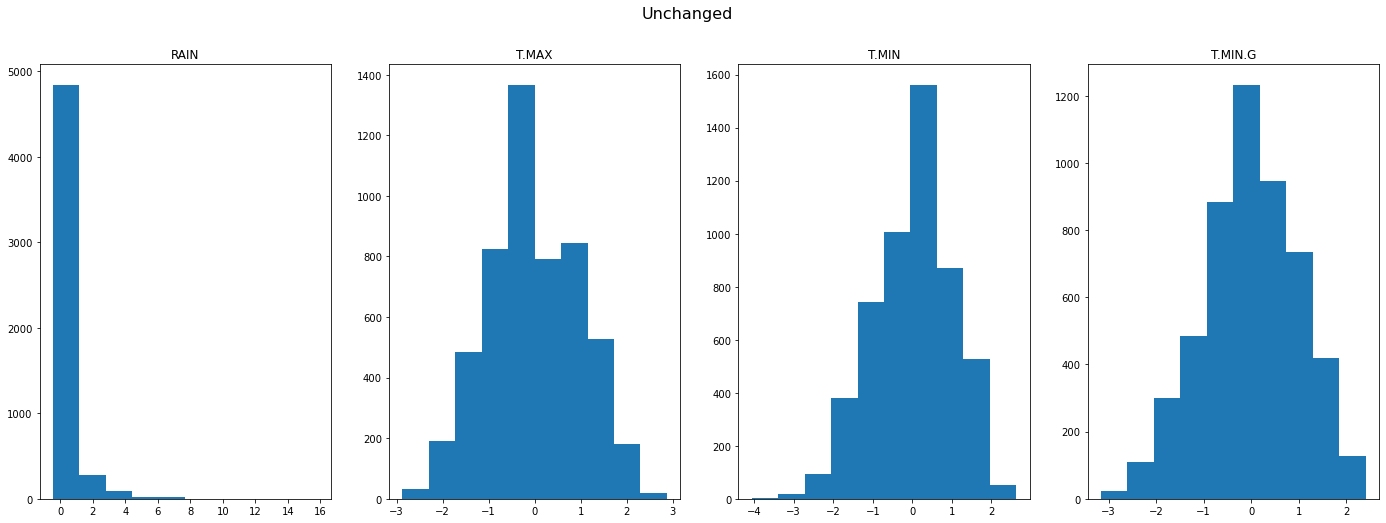

In [33]:
fig, axs = plt.subplots(1, 4, figsize=(24, 8))
axs = axs.flatten()
for idx in range(X_.shape[1]):
    axs[idx].hist(sc_X_[:, idx])
    axs[idx].set_title(imputer.get_feature_names_out()[idx])
plt.suptitle('Unchanged', fontsize=16)
plt.show()

C:\Users\Charles\AppData\Local\Temp\ipykernel_3388\2536722845.py:4: RuntimeWarning: invalid value encountered in power
  axs[idx].hist(sc_X_[:, idx]**0.25)


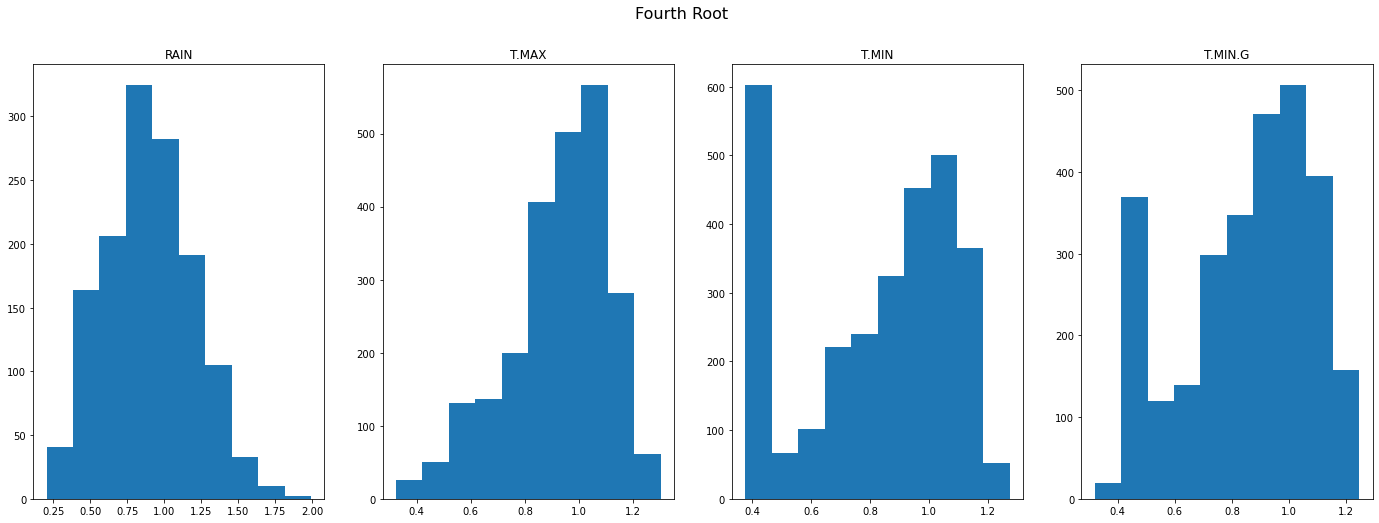

In [34]:
fig, axs = plt.subplots(1, 4, figsize=(24, 8))
axs = axs.flatten()
for idx in range(X_.shape[1]):
    axs[idx].hist(sc_X_[:, idx]**0.25)
    axs[idx].set_title(imputer.get_feature_names_out()[idx])
plt.suptitle('Fourth Root', fontsize=16)
plt.show()

# Pipeline2

In [35]:
def fourth_root(X):
    return X**0.25

# pretrans_pipeline = Pipeline([
#     ('impute', SimpleImputer(strategy='median')),
#     ('function', FunctionTransformer(fourth_root, feature_names_out='one-to-one')),
#     ('scaler', StandardScaler())
# ])
pretrans_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    FunctionTransformer(fourth_root, feature_names_out='one-to-one'),
    MinMaxScaler()
)
cat_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore')
)
num_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    MinMaxScaler()
)
preprocessing2 = ColumnTransformer([
    ('Adjust_dist', pretrans_pipeline, ['RAIN']),
    ('cat', cat_pipeline, cat_list),
    ('num', num_pipeline, ['T.MAX', 'T.MIN', 'T.MIN.G']),
], remainder='drop')

### SGD

In [36]:
sgd_reg = make_pipeline(preprocessing2, SGDRegressor(random_state=7))
sgd_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('Adjust_dist',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<function fourth_root at 0x000002AD9DFD6B90>)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['RAIN']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['IND', 'IND.1', 'IND.2']),
                                                 ('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['T.MAX', 'T.MIN',
                                                   'T.MIN.G'])])),
                ('sgdregressor', SGDRegressor(random_state=7))])

In [37]:
-cross_val_score(sgd_reg, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

array([3.698854  , 3.5519466 , 3.629525  , 3.70821762, 3.63446935])

### Decision Trees

In [39]:
tree_reg = make_pipeline(preprocessing2, DecisionTreeRegressor(random_state=7))
tree_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('Adjust_dist',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<function fourth_root at 0x000002AD9DFD6B90>)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['RAIN']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['IND', 'IND.1', 'IND.2']),
                                                 ('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['T.MAX', 'T.MIN',
                                                   'T.MIN.G'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=7))])

In [40]:
-cross_val_score(tree_reg, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

array([5.00754658, 4.97571293, 4.81058365, 5.15234078, 4.95201554])

### RForest


In [41]:
rforest_reg = make_pipeline(preprocessing, RandomForestRegressor())
rforest_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['IND', 'IND.1', 'IND.2']),
                                                 ('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['RAIN', 'T.MAX', 'T.MIN',
                                                   'T.MIN.G'])])),
                ('randomforestregressor', RandomForestRegressor())])

In [42]:
tree_mse = -cross_val_score(rforest_reg, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
tree_mse

array([3.78201526, 3.6448664 , 3.56168367, 3.8000095 , 3.67512952])

# Parameter Searching

In [43]:
from sklearn.base import clone
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## SGD

In [45]:
param_grid = [
    {
        'sgdregressor__penalty':['l2', 'l1', 'elasticnet'],
        'sgdregressor__alpha':[0.0001, 0.001, 0.01, 0.1],
        'sgdregressor__learning_rate':['constant', 'optimal', 'invscaling', 'adaptive'],
        'sgdregressor__eta0':[0.01, 0.1, 0.5, 1],
    },
]
pca = PCA()
sgd_pipe = make_pipeline(preprocessing2, SGDRegressor(random_state=7))
sgd_gridsearch = GridSearchCV(sgd_pipe, param_grid, cv=3, n_jobs=4, scoring='neg_mean_absolute_error')
sgd_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('Adjust_dist',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out='one-to-one',
                                                                                                              func=<function fourth_root at 0x000002AD9DFD6B90>)),
                                                                                         ('minmaxscaler',
                                                                                          MinMaxScaler())]),
                                                                         ['RAIN']),
                                                                        ('ca...
                                                                                          MinMaxScaler())]),
                                                                         ['T.MAX',
                                                                          'T.MIN',
                                                                          'T.MIN.G'])])),
                                       ('sgdregressor',
                                        SGDRegressor(random_state=7))]),
             n_jobs=4,
             param_grid=[{'sgdregressor__alpha': [0.0001, 0.001, 0.01, 0.1],
                          'sgdregressor__eta0': [0.01, 0.1, 0.5, 1],
                          'sgdregressor__learning_rate': ['constant', 'optimal',
                                                          'invscaling',
                                                          'adaptive'],
                          'sgdregressor__penalty': ['l2', 'l1', 'elasticnet']}],
             scoring='neg_mean_absolute_error')

In [46]:
pd.DataFrame(sgd_gridsearch.cv_results_).sort_values(by='mean_test_score', ascending=False).head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_sgdregressor__alpha,param_sgdregressor__eta0,param_sgdregressor__learning_rate,param_sgdregressor__penalty,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
94,0.063666,0.013816,0.007333,0.000472,0.001,1,adaptive,l1,"{'sgdregressor__alpha': 0.001, 'sgdregressor__...",-3.599022,-3.635445,-3.674918,-3.636462,0.030993,1
82,0.088000,0.029876,0.007334,0.000471,0.001,0.5,adaptive,l1,"{'sgdregressor__alpha': 0.001, 'sgdregressor__...",-3.597456,-3.635998,-3.676451,-3.636635,0.032252,2
7,0.054001,0.003742,0.007664,0.000473,0.0001,0.01,invscaling,l1,"{'sgdregressor__alpha': 0.0001, 'sgdregressor_...",-3.592278,-3.652878,-3.670098,-3.638418,0.033375,3


In [47]:
-cross_val_score(sgd_gridsearch.best_estimator_, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

array([3.67526217, 3.5604983 , 3.60775925, 3.69473832, 3.63333188])

## Decision Tree

In [48]:
param_grid = [
    {
        'decisiontreeregressor__criterion':['absolute_error'],
        'decisiontreeregressor__splitter':['best'],
        # 'decisiontreeregressor__max_depth':[],
        'decisiontreeregressor__min_samples_split':[2,3,4,8],
        'decisiontreeregressor__min_samples_leaf':[1,2,3,4,5],
        'decisiontreeregressor__max_features':[None, 'sqrt', 3, 4, 8, 12, 17],
    },
]
# pca = PCA()
tree_pipe = make_pipeline(preprocessing2, DecisionTreeRegressor(random_state=7))
tree_gridsearch = GridSearchCV(tree_pipe, param_grid, cv=3, n_jobs=4, scoring='neg_mean_absolute_error')
tree_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('Adjust_dist',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out='one-to-one',
                                                                                                              func=<function fourth_root at 0x000002AD9DFD6B90>)),
                                                                                         ('minmaxscaler',
                                                                                          MinMaxScaler())]),
                                                                         ['RAIN']),
                                                                        ('ca...
                                        DecisionTreeRegressor(random_state=7))]),
             n_jobs=4,
             param_grid=[{'decisiontreeregressor__criterion': ['absolute_error'],
                          'decisiontreeregressor__max_features': [None, 'sqrt',
                                                                  3, 4, 8, 12,
                                                                  17],
                          'decisiontreeregressor__min_samples_leaf': [1, 2, 3,
                                                                      4, 5],
                          'decisiontreeregressor__min_samples_split': [2, 3, 4,
                                                                       8],
                          'decisiontreeregressor__splitter': ['best']}],
             scoring='neg_mean_absolute_error')

In [49]:
pd.DataFrame(tree_gridsearch.cv_results_).sort_values(by='mean_test_score', ascending=False).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_decisiontreeregressor__criterion,param_decisiontreeregressor__max_features,param_decisiontreeregressor__min_samples_leaf,param_decisiontreeregressor__min_samples_split,param_decisiontreeregressor__splitter,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
39,0.129999,0.006976,0.007334,4.715390e-04,absolute_error,sqrt,5,8,best,{'decisiontreeregressor__criterion': 'absolute...,-3.820548,-3.852898,-3.799025,-3.824157,0.022141,1
38,0.131332,0.008730,0.006999,8.778064e-07,absolute_error,sqrt,5,4,best,{'decisiontreeregressor__criterion': 'absolute...,-3.820548,-3.852898,-3.799025,-3.824157,0.022141,1
37,0.132665,0.010529,0.007334,4.708663e-04,absolute_error,sqrt,5,3,best,{'decisiontreeregressor__criterion': 'absolute...,-3.820548,-3.852898,-3.799025,-3.824157,0.022141,1
36,0.136332,0.008179,0.008000,1.474002e-06,absolute_error,sqrt,5,2,best,{'decisiontreeregressor__criterion': 'absolute...,-3.820548,-3.852898,-3.799025,-3.824157,0.022141,1
79,0.130334,0.007364,0.006999,1.123916e-06,absolute_error,4,5,8,best,{'decisiontreeregressor__criterion': 'absolute...,-3.820548,-3.852898,-3.842085,-3.838510,0.013447,5
76,0.129999,0.006529,0.007333,4.713705e-04,absolute_error,4,5,2,best,{'decisiontreeregressor__criterion': 'absolute...,-3.820548,-3.852898,-3.842085,-3.838510,0.013447,5
77,0.129996,0.007347,0.007333,4.710894e-04,absolute_error,4,5,3,best,{'decisiontreeregressor__criterion': 'absolute...,-3.820548,-3.852898,-3.842085,-3.838510,0.013447,5
78,0.130332,0.006549,0.007334,4.733960e-04,absolute_error,4,5,4,best,{'decisiontreeregressor__criterion': 'absolute...,-3.820548,-3.852898,-3.842085,-3.838510,0.013447,5
34,0.134665,0.011614,0.007666,4.722698e-04,absolute_error,sqrt,4,4,best,{'decisiontreeregressor__criterion': 'absolute...,-3.930168,-3.783460,-3.855000,-3.856209,0.059900,9
35,0.134999,0.014758,0.009667,1.699862e-03,absolute_error,sqrt,4,8,best,{'decisiontreeregressor__criterion': 'absolute...,-3.930168,-3.783460,-3.855000,-3.856209,0.059900,9


In [50]:
-cross_val_score(tree_gridsearch.best_estimator_, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

array([3.95297529, 3.93485266, 3.85860266, 3.89754278, 3.70108944])

#### AVG Mean improved
Average mean absolute error for decision tree in pipeline1 was 4.99, now 3.87

## RForest

In [51]:
param_grid = [
    {
        # 'pca__n_components':[0.9, 0.95, 0.98],
        'randomforestregressor__n_estimators':[50,100,150,200,250],
        'randomforestregressor__min_samples_split':[2,3,4,8],
        'randomforestregressor__min_samples_leaf':[1,2,3,4,5],
        'randomforestregressor__random_state':[7],
    },
    {
        # 'pca__n_components':[3, 4, 6, 8, 12, 16, 17],
        'randomforestregressor__n_estimators':[50,100,150,200,250],
        'randomforestregressor__min_samples_split':[2,3,4,8],
        'randomforestregressor__min_samples_leaf':[1,2,3,4,5],
        'randomforestregressor__random_state':[7],
    },
]
pca = PCA()
rforest_pipe = make_pipeline(preprocessing2, RandomForestRegressor(random_state=7))
rforest_gridsearch = GridSearchCV(rforest_pipe, param_grid, cv=3, n_jobs=6, scoring='neg_mean_absolute_error')
rforest_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('Adjust_dist',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out='one-to-one',
                                                                                                              func=<function fourth_root at 0x000002AD9DFD6B90>)),
                                                                                         ('minmaxscaler',
                                                                                          MinMaxScaler())]),
                                                                         ['RAIN']),
                                                                        ('ca...
                                                                       8],
                          'randomforestregressor__n_estimators': [50, 100, 150,
                                                                  200, 250],
                          'randomforestregressor__random_state': [7]},
                         {'randomforestregressor__min_samples_leaf': [1, 2, 3,
                                                                      4, 5],
                          'randomforestregressor__min_samples_split': [2, 3, 4,
                                                                       8],
                          'randomforestregressor__n_estimators': [50, 100, 150,
                                                                  200, 250],
                          'randomforestregressor__random_state': [7]}],
             scoring='neg_mean_absolute_error')

In [52]:
pd.Series(rforest_gridsearch.best_estimator_['randomforestregressor'].feature_importances_, index=rforest_gridsearch.best_estimator_[:-1].get_feature_names_out())

Adjust_dist__RAIN    0.243592
cat__IND_0.0         0.004001
cat__IND_1.0         0.000020
cat__IND_4.0         0.005057
cat__IND.1_0.0       0.002117
cat__IND.1_1.0       0.000000
cat__IND.1_2.0       0.000032
cat__IND.1_4.0       0.001911
cat__IND.2_0.0       0.003383
cat__IND.2_1.0       0.000299
cat__IND.2_2.0       0.000000
cat__IND.2_3.0       0.000000
cat__IND.2_4.0       0.001887
num__T.MAX           0.301026
num__T.MIN           0.174689
num__T.MIN.G         0.261985
dtype: float64

In [53]:
pd.DataFrame(rforest_gridsearch.cv_results_).sort_values(by='mean_test_score', ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestregressor__min_samples_leaf,param_randomforestregressor__min_samples_split,param_randomforestregressor__n_estimators,param_randomforestregressor__random_state,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
199,1.547991,0.016868,0.067662,0.000468,5,8,250,7,"{'randomforestregressor__min_samples_leaf': 5,...",-3.615445,-3.491986,-3.598356,-3.568596,0.054618,1
84,1.575667,0.005559,0.069332,0.002054,5,2,250,7,"{'randomforestregressor__min_samples_leaf': 5,...",-3.615445,-3.491986,-3.598356,-3.568596,0.054618,1
194,1.591071,0.035562,0.068669,0.001248,5,4,250,7,"{'randomforestregressor__min_samples_leaf': 5,...",-3.615445,-3.491986,-3.598356,-3.568596,0.054618,1
189,1.576029,0.007226,0.067025,0.000036,5,3,250,7,"{'randomforestregressor__min_samples_leaf': 5,...",-3.615445,-3.491986,-3.598356,-3.568596,0.054618,1
184,1.570720,0.027008,0.071999,0.003743,5,2,250,7,"{'randomforestregressor__min_samples_leaf': 5,...",-3.615445,-3.491986,-3.598356,-3.568596,0.054618,1


In [54]:
-cross_val_score(rforest_gridsearch.best_estimator_, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

array([3.65349249, 3.56704526, 3.47542414, 3.67287753, 3.54314215])

In [55]:
time_X = X_train.copy()
time_X = time_X.sort_values(by='DATE').reset_index(drop=True)

In [56]:
day_step = pd.Series(np.arange(len(time_X)), name='daystep')
df_test = pd.concat([time_X.sort_values(by='DATE'), day_step], axis=1)
# ,y_train.reset_index(drop=True)

In [57]:
df_test.loc[:, ['daystep']]

,daystep
0,0
1,1
2,2
3,3
4,4
...,...
5254,5254
5255,5255
5256,5256
5257,5257


In [58]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(df_test.loc[:, ['daystep']], y_train)

LinearRegression()

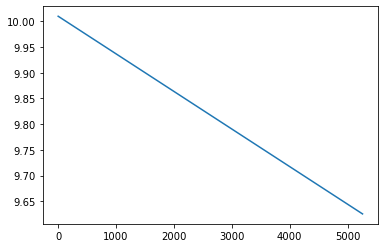

In [59]:
pred = pd.Series(linear.predict(df_test.loc[:, ['daystep']]), index=df_test.index)
pred.plot()
plt.show()

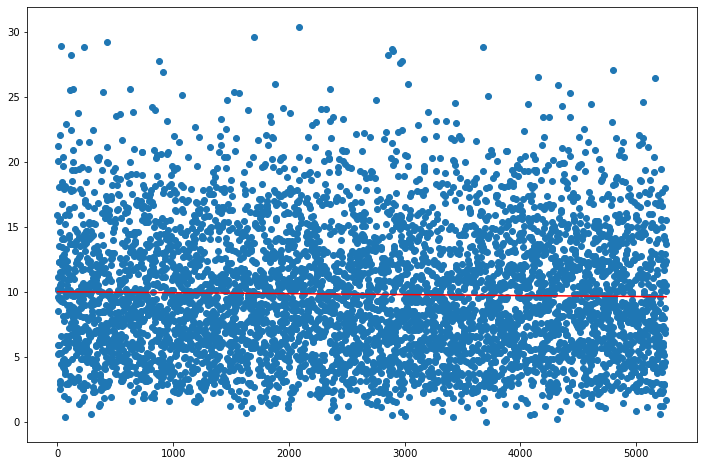

In [60]:
plt.figure(figsize=(12,8))
plt.scatter(df_test['daystep'],y_train.reset_index(drop=True))
plt.plot(pred, color='red')
plt.show()

## Lag Features

In [61]:
# time_X['LAG1'] = time_X[
time_X['LAG1'] = time_X.join(y_train.reset_index(drop=True))['WIND'].shift(1)
time_X['RAINLAG'] = time_X['RAIN'].shift(1)
time_X

,DATE,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G,LAG1,RAINLAG
0,1961-01-02,0,5.1,0.0,7.2,0.0,4.2,1.1,NaN,NaN
1,1961-01-03,0,0.4,0.0,5.5,0.0,0.5,-0.5,15.92,5.1
2,1961-01-04,0,0.2,0.0,5.6,0.0,0.4,-3.2,20.08,0.4
3,1961-01-05,0,10.4,0.0,7.2,1.0,-1.5,-7.5,10.21,0.2
4,1961-01-06,0,0.0,0.0,6.5,0.0,1.2,-2.0,5.91,10.4
...,...,...,...,...,...,...,...,...,...,...
5254,1978-12-26,0,9.0,0.0,9.8,0.0,2.3,-2.0,10.50,4.9
5255,1978-12-27,0,16.8,0.0,9.8,0.0,4.0,0.0,1.67,9.0
5256,1978-12-29,0,14.7,0.0,5.0,0.0,3.5,3.2,10.08,16.8
5257,1978-12-30,0,4.9,0.0,2.9,0.0,0.3,-0.5,13.67,14.7


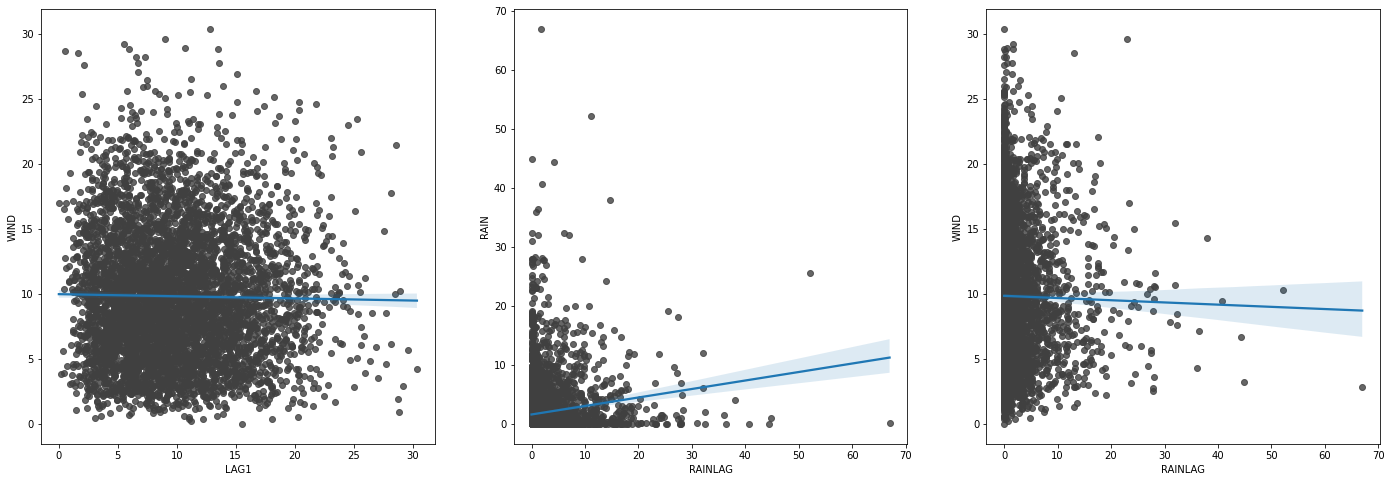

In [62]:
fig, ax = plt.subplots(1, 3, figsize=(24,8))
sns.regplot(x='LAG1', y='WIND', data=time_X.join(y_train.reset_index(drop=True)), scatter_kws=dict(color='0.25'), ax=ax[0])
sns.regplot(x='RAINLAG', y='RAIN', data=time_X.join(y_train.reset_index(drop=True)), scatter_kws=dict(color='0.25'), ax=ax[1])
sns.regplot(x='RAINLAG', y='WIND', data=time_X.join(y_train.reset_index(drop=True)), scatter_kws=dict(color='0.25'), ax=ax[2])
plt.show()

In [63]:
import datetime
from dateutil.rrule import rrule, MONTHLY

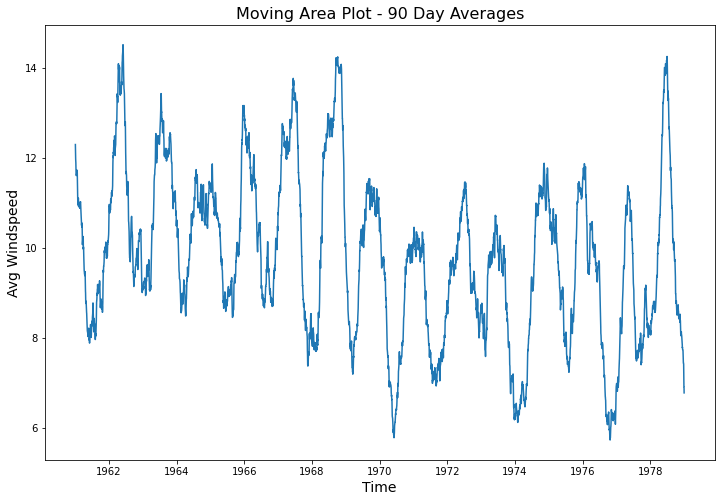

In [64]:
m_avg = time_X[['RAIN', 'T.MAX', 'T.MIN', 'T.MIN.G']].join(y_train).rolling(
    window=90,
    center=True,
    min_periods=30
).mean()
plt.figure(figsize=(12,8))
plt.plot(time_X['DATE'], m_avg['WIND'])
plt.title('Moving Area Plot - 90 Day Averages', fontsize=16)
plt.ylabel('Avg Windspeed', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.show()

In [65]:
from statsmodels.tsa.deterministic import DeterministicProcess
dp = DeterministicProcess(
    index=time_X.DATE,
    constant=True,
    order=1,
    drop=True,
)
_ = dp.in_sample()
_.head()

,const,trend
DATE,,
1961-01-02,1.0,1.0
1961-01-03,1.0,2.0
1961-01-04,1.0,3.0
1961-01-05,1.0,4.0
1961-01-06,1.0,5.0


In [66]:
month = time_X['DATE'].apply(lambda X: X.month)
year = time_X['DATE'].apply(lambda X: X.year)
# time_X = pd.concat([time_X, year, month,], axis=1)

In [67]:
pd.date_range(start=time_X['DATE'].min(), end=time_X['DATE'].max(), periods=None, freq='M', tz=None, normalize=False, name=None,  inclusive=None)

DatetimeIndex(['1961-01-31', '1961-02-28', '1961-03-31', '1961-04-30',
               '1961-05-31', '1961-06-30', '1961-07-31', '1961-08-31',
               '1961-09-30', '1961-10-31',
               ...
               '1978-03-31', '1978-04-30', '1978-05-31', '1978-06-30',
               '1978-07-31', '1978-08-31', '1978-09-30', '1978-10-31',
               '1978-11-30', '1978-12-31'],
              dtype='datetime64[ns]', length=216, freq='M')

In [68]:
month.name = 'MONTH'
time_X['MONTH'] = month

In [69]:
time_X

,DATE,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G,LAG1,RAINLAG,MONTH
0,1961-01-02,0,5.1,0.0,7.2,0.0,4.2,1.1,NaN,NaN,1
1,1961-01-03,0,0.4,0.0,5.5,0.0,0.5,-0.5,15.92,5.1,1
2,1961-01-04,0,0.2,0.0,5.6,0.0,0.4,-3.2,20.08,0.4,1
3,1961-01-05,0,10.4,0.0,7.2,1.0,-1.5,-7.5,10.21,0.2,1
4,1961-01-06,0,0.0,0.0,6.5,0.0,1.2,-2.0,5.91,10.4,1
...,...,...,...,...,...,...,...,...,...,...,...
5254,1978-12-26,0,9.0,0.0,9.8,0.0,2.3,-2.0,10.50,4.9,12
5255,1978-12-27,0,16.8,0.0,9.8,0.0,4.0,0.0,1.67,9.0,12
5256,1978-12-29,0,14.7,0.0,5.0,0.0,3.5,3.2,10.08,16.8,12
5257,1978-12-30,0,4.9,0.0,2.9,0.0,0.3,-0.5,13.67,14.7,12


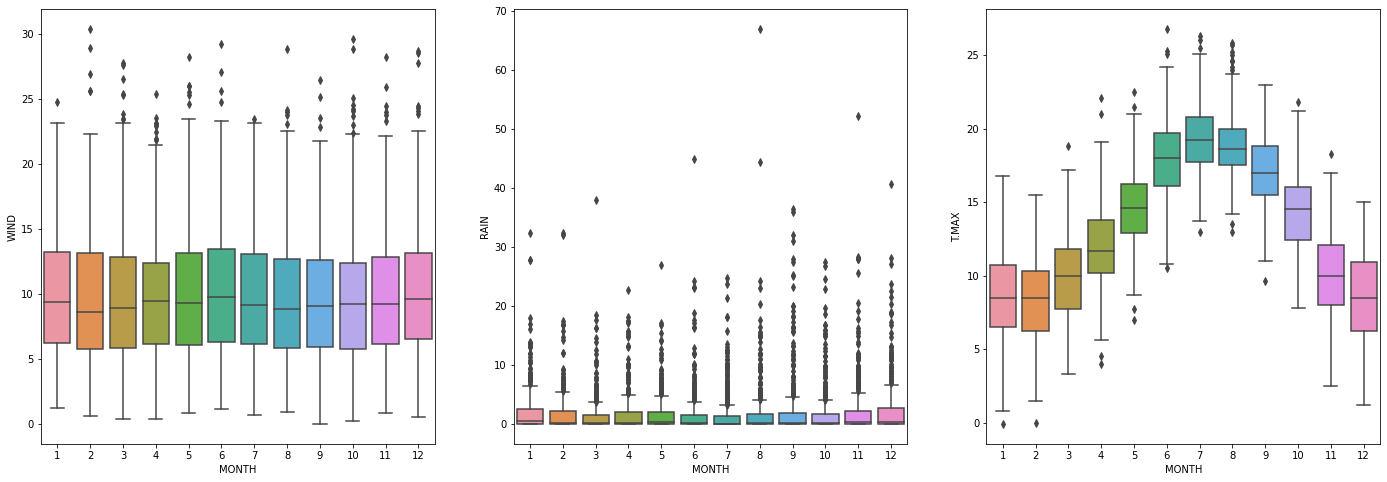

In [70]:
fig, ax = plt.subplots(1, 3, figsize=(24,8))
sns.boxplot(x='MONTH', y='WIND', data=time_X.join(y_train.reset_index(drop=True)),  ax=ax[0])
sns.boxplot(x='MONTH', y='RAIN', data=time_X.join(y_train.reset_index(drop=True)),  ax=ax[1])
sns.boxplot(x='MONTH', y='T.MAX', data=time_X.join(y_train.reset_index(drop=True)),  ax=ax[2])

plt.show()

#### Takeaway: 
* If we include lag of reading form previous day, our MAE is down to ~3.58
* Via Transformation these 4 features would represent 98% of importances. (Was 94%)

# Pipeline 3 -- Feature Creation

## Remove Outliers? - No.

We've gone this far without touching them, but perhaps removing outliers will help our dataset. We will do a standard zscore removing instances which include features above three standard deviations from the mean.

In [71]:
imp = SimpleImputer(strategy='median')
centered_X = imp.fit_transform(X_train.iloc[:, 1:])

In [72]:
from scipy import stats
# Z-score 
z = np.abs(stats.zscore(centered_X))

In [73]:
mask = pd.DataFrame(z<3).T.all()

In [74]:
z_df = pd.DataFrame(z, columns=imp.get_feature_names_out())
mask = (z_df['RAIN'] < 3)
X_train.reset_index(drop=True)[mask].shape

(5136, 8)

In [75]:
X_train.reset_index(drop=True)[(z_df[['RAIN', 'T.MAX', 'T.MIN', 'T.MIN.G']] < 3).T.all()].shape

(5124, 8)

In [76]:
centered_X = X_train.reset_index(drop=True)[(z_df[['RAIN', 'T.MAX', 'T.MIN', 'T.MIN.G']] < 3).T.all()]
centered_y = y_train.reset_index(drop=True)[(z_df[['RAIN', 'T.MAX', 'T.MIN', 'T.MIN.G']] < 3).T.all()]

##### Takeaway: Removing outliers removes alot of features
* Z-Score of 3 at every feature removes over 20% of data
    * Z-Score should be irrelevant on indicators, because this is more of a category
* Z-Score of 3 on RAIN only removes 123 instances
* Z-Score of ALL true numeric columsn reduces instances by 138

### Step & Lag Features

In [77]:
centered_X = centered_X.sort_values(by='DATE').reset_index(drop=True)

In [78]:
day_step = pd.Series(np.arange(len(centered_X)), name='daystep')
df_test = pd.concat([centered_X, day_step], axis=1)
# ,y_train.reset_index(drop=True)

In [79]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(df_test.loc[:, ['daystep']], centered_y)

LinearRegression()

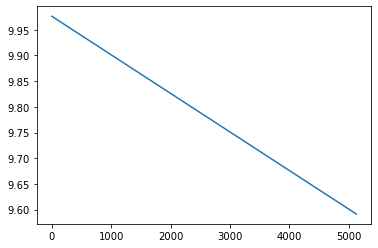

In [80]:
pred = pd.Series(linear.predict(df_test.loc[:, ['daystep']]), index=df_test.index)
pred.plot()
plt.show()

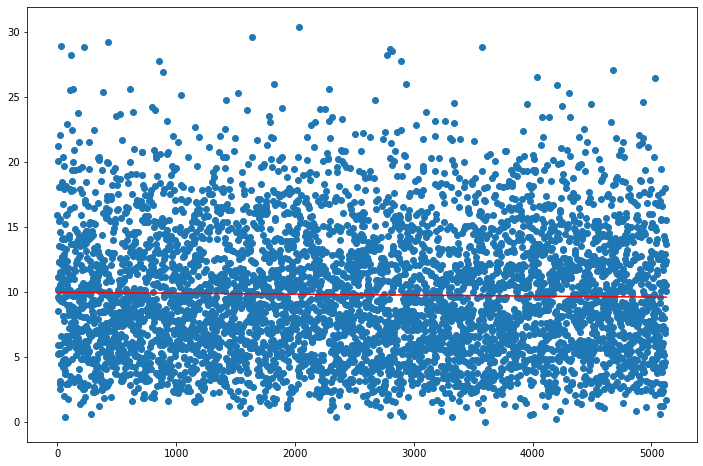

In [81]:
plt.figure(figsize=(12,8))
plt.scatter(df_test['daystep'],centered_y.reset_index(drop=True))
plt.plot(pred, color='red')
plt.show()

#### Lag Features

In [82]:
# time_X['LAG1'] = time_X[
centered_X['LAG1'] = centered_X.join(centered_y)['WIND'].shift(1)
centered_X['RAINLAG'] = centered_X['RAIN'].shift(1)
centered_X

,DATE,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G,LAG1,RAINLAG
0,1961-01-02,0,5.1,0.0,7.2,0.0,4.2,1.1,NaN,NaN
1,1961-01-03,0,0.4,0.0,5.5,0.0,0.5,-0.5,15.92,5.1
2,1961-01-04,0,0.2,0.0,5.6,0.0,0.4,-3.2,20.08,0.4
3,1961-01-05,0,10.4,0.0,7.2,1.0,-1.5,-7.5,10.21,0.2
4,1961-01-06,0,0.0,0.0,6.5,0.0,1.2,-2.0,5.91,10.4
...,...,...,...,...,...,...,...,...,...,...
5119,1978-12-22,0,1.9,0.0,6.4,1.0,-2.1,-6.2,11.96,4.2
5120,1978-12-24,0,4.9,0.0,6.5,0.0,4.3,4.1,11.75,1.9
5121,1978-12-26,0,9.0,0.0,9.8,0.0,2.3,-2.0,7.79,4.9
5122,1978-12-30,0,4.9,0.0,2.9,0.0,0.3,-0.5,4.54,9.0


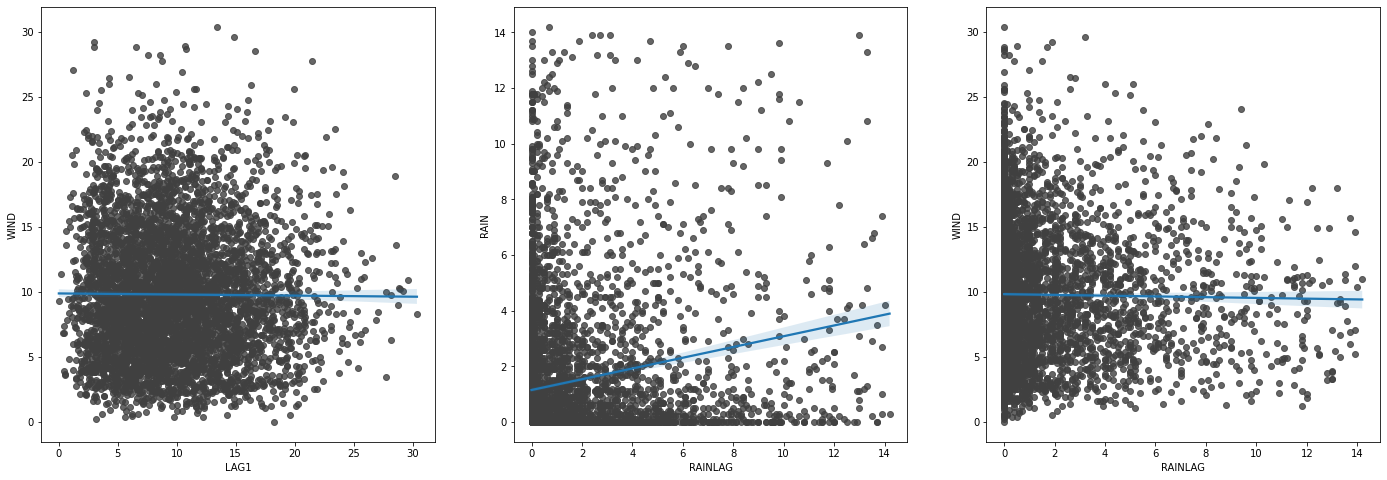

In [83]:
fig, ax = plt.subplots(1, 3, figsize=(24,8))
sns.regplot(x='LAG1', y='WIND', data=centered_X.join(centered_y.reset_index(drop=True)), scatter_kws=dict(color='0.25'), ax=ax[0])
sns.regplot(x='RAINLAG', y='RAIN', data=centered_X.join(centered_y.reset_index(drop=True)), scatter_kws=dict(color='0.25'), ax=ax[1])
sns.regplot(x='RAINLAG', y='WIND', data=centered_X.join(centered_y.reset_index(drop=True)), scatter_kws=dict(color='0.25'), ax=ax[2])
plt.show()

In [84]:
import datetime
from dateutil.rrule import rrule, MONTHLY

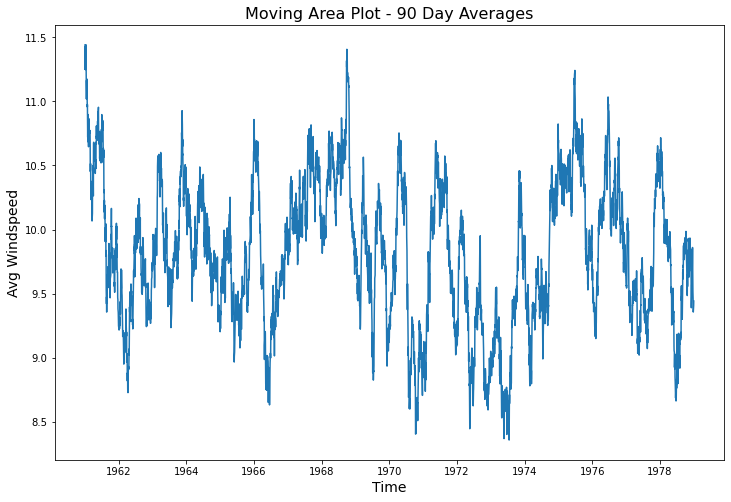

In [85]:
m_avg = centered_X[['RAIN', 'T.MAX', 'T.MIN', 'T.MIN.G']].join(centered_y).rolling(
    window=90,
    center=True,
    min_periods=30
).mean()
plt.figure(figsize=(12,8))
plt.plot(centered_X['DATE'], m_avg['WIND'])
plt.title('Moving Area Plot - 90 Day Averages', fontsize=16)
plt.ylabel('Avg Windspeed', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.show()

In [86]:
from statsmodels.tsa.deterministic import DeterministicProcess
dp = DeterministicProcess(
    index=time_X.DATE,
    constant=True,
    order=1,
    drop=True,
)
_ = dp.in_sample()
_.head()

,const,trend
DATE,,
1961-01-02,1.0,1.0
1961-01-03,1.0,2.0
1961-01-04,1.0,3.0
1961-01-05,1.0,4.0
1961-01-06,1.0,5.0


In [87]:
month = centered_X['DATE'].apply(lambda X: X.month)
year = centered_X['DATE'].apply(lambda X: X.year)
# time_X = pd.concat([time_X, year, month,], axis=1)

In [88]:
pd.date_range(start=centered_X['DATE'].min(), end=centered_X['DATE'].max(), periods=None, freq='M', tz=None, normalize=False, name=None,  inclusive=None)

DatetimeIndex(['1961-01-31', '1961-02-28', '1961-03-31', '1961-04-30',
               '1961-05-31', '1961-06-30', '1961-07-31', '1961-08-31',
               '1961-09-30', '1961-10-31',
               ...
               '1978-03-31', '1978-04-30', '1978-05-31', '1978-06-30',
               '1978-07-31', '1978-08-31', '1978-09-30', '1978-10-31',
               '1978-11-30', '1978-12-31'],
              dtype='datetime64[ns]', length=216, freq='M')

In [89]:
month.name = 'MONTH'
centered_X['MONTH'] = month

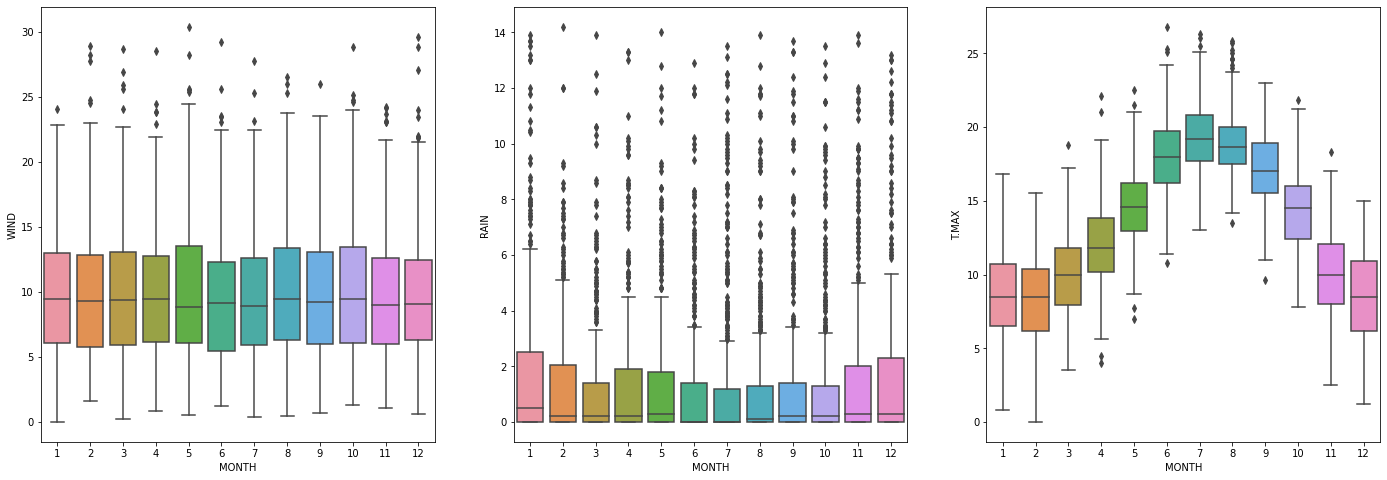

In [90]:
fig, ax = plt.subplots(1, 3, figsize=(24,8))
sns.boxplot(x='MONTH', y='WIND', data=centered_X.join(centered_y),  ax=ax[0])
sns.boxplot(x='MONTH', y='RAIN', data=centered_X.join(centered_y),  ax=ax[1])
sns.boxplot(x='MONTH', y='T.MAX', data=centered_X.join(centered_y),  ax=ax[2])

plt.show()

### Takeaway: Removal of Outliers detrimental to data
The removal of outliers shows a great detriment in data.
* Colder months are showing as warmer than the warmest months. 
    * Warm months will have the highest proportion of high temperature outliers eliminated
    * Cold months will have the highest proportion of low temperature outliers eliminated

In [91]:
del centered_X
del centered_y
gc.collect()

46262

## Time-step & Lag Feature Analysis

Date Format is: <b>YYYY-MM-DD</b>
Features which could be extracted from this;
* Year
* Month
* Day
* Season
* Year lag month
* Year lag day
* Month lag day
* Month lag year
* Day of week

<b><u>Hypothesis:</u></b>
Powerful combinations will include;
* Year & Month
* Year & Day
* Year lag Month


Create copy of Date & Check for missing values

In [92]:
time_train = X_train.join(y_train).copy()
time_train.sort_values(by='DATE', inplace=True)
time_train.reset_index(inplace=True, drop=True)
X_time_train = time_train.iloc[:, :-1]
y_time_train = time_train.iloc[:, -1]

In [93]:
day_step = pd.Series(np.arange(len(X_time_train)), name='daystep')
df_test = pd.concat([X_time_train, day_step], axis=1)

In [94]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(df_test.loc[:, ['daystep']], y_time_train)

LinearRegression()

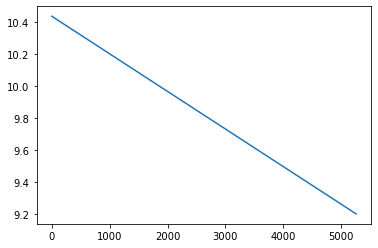

In [95]:
pred = pd.Series(linear.predict(df_test.loc[:, ['daystep']]), index=df_test.index)
pred.plot()
plt.show()

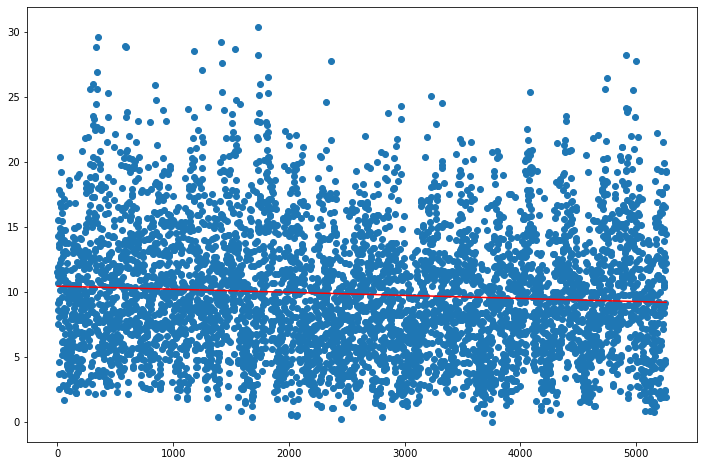

In [96]:
plt.figure(figsize=(12,8))
plt.scatter(df_test['daystep'],y_time_train.reset_index(drop=True))
plt.plot(pred, color='red')
plt.show()

## Lag Features

In [97]:
# time_X['LAG1'] = time_X[
X_time_train['LAG1'] = X_time_train.join(y_time_train)['WIND'].shift(1)
X_time_train['RAINLAG'] = X_time_train['RAIN'].shift(1)
X_time_train

,DATE,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G,LAG1,RAINLAG
0,1961-01-02,0,5.1,0.0,7.2,0.0,4.2,1.1,NaN,NaN
1,1961-01-03,0,0.4,0.0,5.5,0.0,0.5,-0.5,11.50,5.1
2,1961-01-04,0,0.2,0.0,5.6,0.0,0.4,-3.2,11.25,0.4
3,1961-01-05,0,10.4,0.0,7.2,1.0,-1.5,-7.5,8.63,0.2
4,1961-01-06,0,0.0,0.0,6.5,0.0,1.2,-2.0,11.92,10.4
...,...,...,...,...,...,...,...,...,...,...
5254,1978-12-26,0,9.0,0.0,9.8,0.0,2.3,-2.0,12.25,4.9
5255,1978-12-27,0,16.8,0.0,9.8,0.0,4.0,0.0,1.96,9.0
5256,1978-12-29,0,14.7,0.0,5.0,0.0,3.5,3.2,14.46,16.8
5257,1978-12-30,0,4.9,0.0,2.9,0.0,0.3,-0.5,19.17,14.7


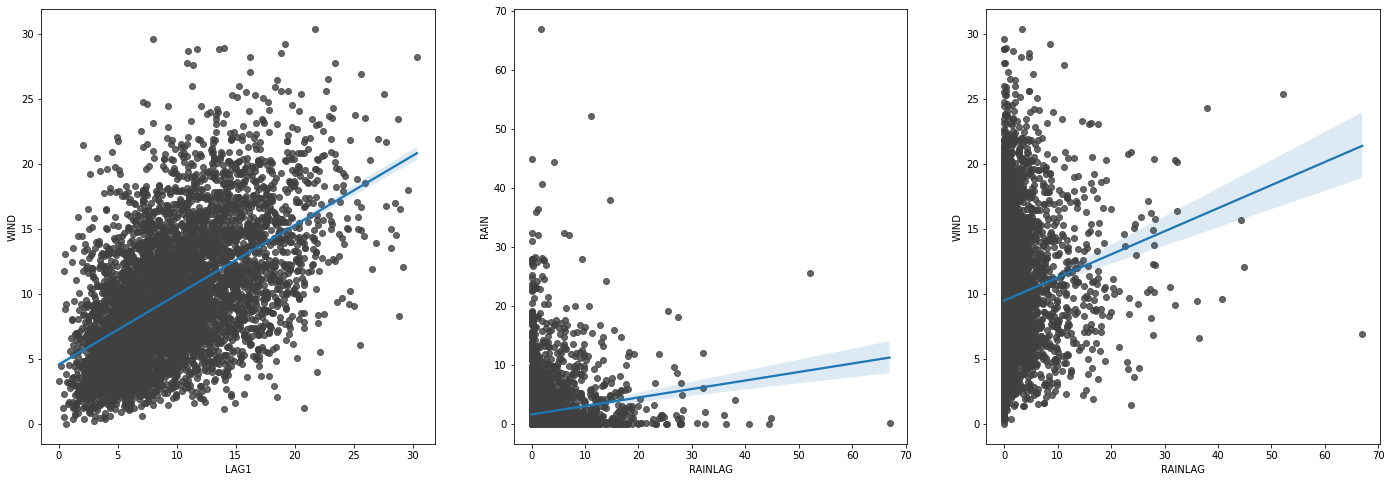

In [98]:
fig, ax = plt.subplots(1, 3, figsize=(24, 8))
sns.regplot(x='LAG1', y='WIND', data=X_time_train.join(y_time_train), scatter_kws=dict(color='0.25'), ax=ax[0])
sns.regplot(x='RAINLAG', y='RAIN', data=X_time_train.join(y_time_train), scatter_kws=dict(color='0.25'), ax=ax[1])
sns.regplot(x='RAINLAG', y='WIND', data=X_time_train.join(y_time_train), scatter_kws=dict(color='0.25'), ax=ax[2])
plt.show()

#### Takeaway: WINDLAG & RAINLAG are useful features

In [99]:
linear = LinearRegression()
linear.fit(X_time_train.drop(index=0).loc[:, ['RAINLAG']], y_time_train.drop(index=0))

LinearRegression()

In [100]:
pred = linear.predict(X_time_train.drop(index=0).loc[:, ['RAINLAG']])

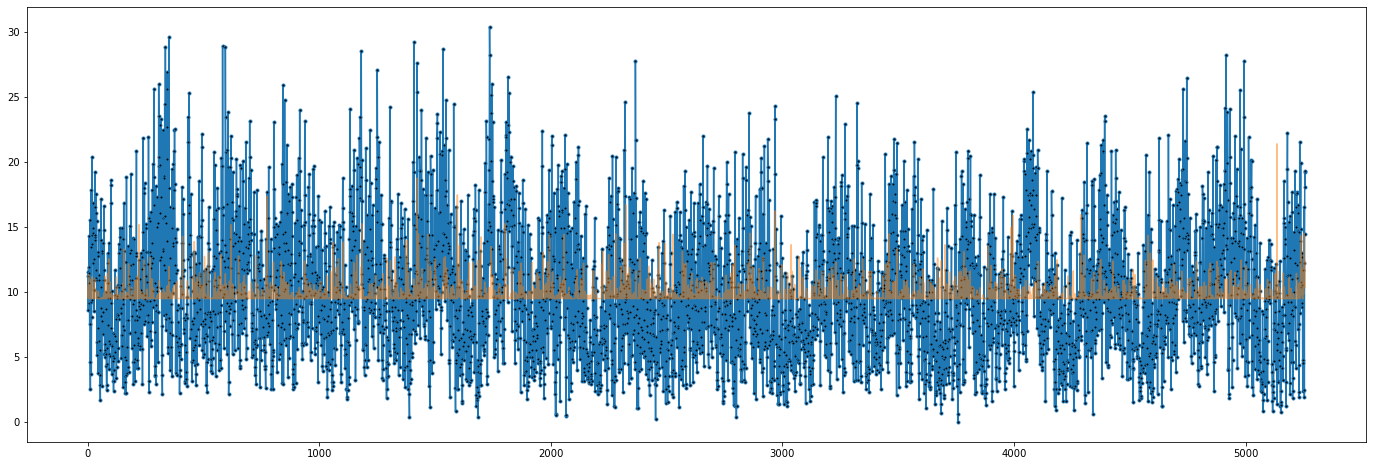

In [101]:
plt.figure(figsize=(24,8))
plt.plot(y_time_train, marker='.', markerfacecolor='black')
plt.plot(pred, alpha=0.5)
plt.show()

## Other Time Features

* Moving Average
* Month of year as feature

In [102]:
import datetime
from dateutil.rrule import rrule, MONTHLY

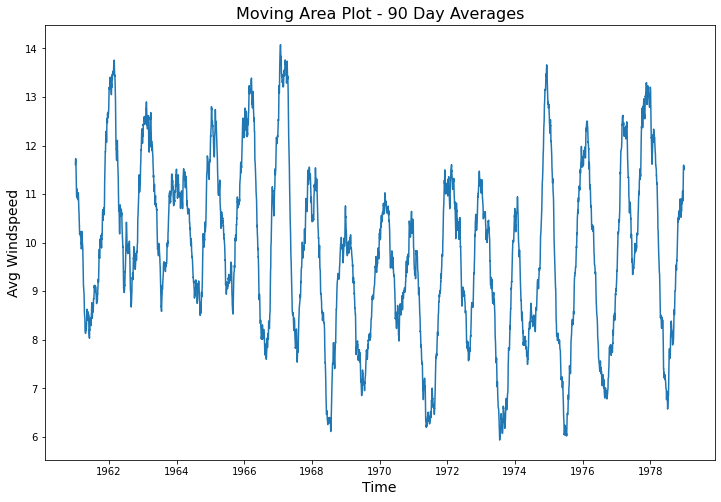

In [103]:
m_avg = X_time_train[['RAIN', 'T.MAX', 'T.MIN', 'T.MIN.G']].join(y_time_train).rolling(
    window=90,
    center=True,
    min_periods=30
).mean()
plt.figure(figsize=(12,8))
plt.plot(X_time_train['DATE'], m_avg['WIND'])
plt.title('Moving Area Plot - 90 Day Averages', fontsize=16)
plt.ylabel('Avg Windspeed', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.show()

In [104]:
month = X_time_train['DATE'].apply(lambda X: X.month)
year = X_time_train['DATE'].apply(lambda X: X.year)
# time_X = pd.concat([time_X, year, month,], axis=1)

In [105]:
pd.date_range(start=X_time_train['DATE'].min(), end=X_time_train['DATE'].max(), periods=None, freq='M', tz=None, normalize=False, name=None,  inclusive=None)

DatetimeIndex(['1961-01-31', '1961-02-28', '1961-03-31', '1961-04-30',
               '1961-05-31', '1961-06-30', '1961-07-31', '1961-08-31',
               '1961-09-30', '1961-10-31',
               ...
               '1978-03-31', '1978-04-30', '1978-05-31', '1978-06-30',
               '1978-07-31', '1978-08-31', '1978-09-30', '1978-10-31',
               '1978-11-30', '1978-12-31'],
              dtype='datetime64[ns]', length=216, freq='M')

In [106]:
month.name = 'MONTH'
X_time_train['MONTH'] = month

In [107]:
X_time_train

,DATE,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G,LAG1,RAINLAG,MONTH
0,1961-01-02,0,5.1,0.0,7.2,0.0,4.2,1.1,NaN,NaN,1
1,1961-01-03,0,0.4,0.0,5.5,0.0,0.5,-0.5,11.50,5.1,1
2,1961-01-04,0,0.2,0.0,5.6,0.0,0.4,-3.2,11.25,0.4,1
3,1961-01-05,0,10.4,0.0,7.2,1.0,-1.5,-7.5,8.63,0.2,1
4,1961-01-06,0,0.0,0.0,6.5,0.0,1.2,-2.0,11.92,10.4,1
...,...,...,...,...,...,...,...,...,...,...,...
5254,1978-12-26,0,9.0,0.0,9.8,0.0,2.3,-2.0,12.25,4.9,12
5255,1978-12-27,0,16.8,0.0,9.8,0.0,4.0,0.0,1.96,9.0,12
5256,1978-12-29,0,14.7,0.0,5.0,0.0,3.5,3.2,14.46,16.8,12
5257,1978-12-30,0,4.9,0.0,2.9,0.0,0.3,-0.5,19.17,14.7,12


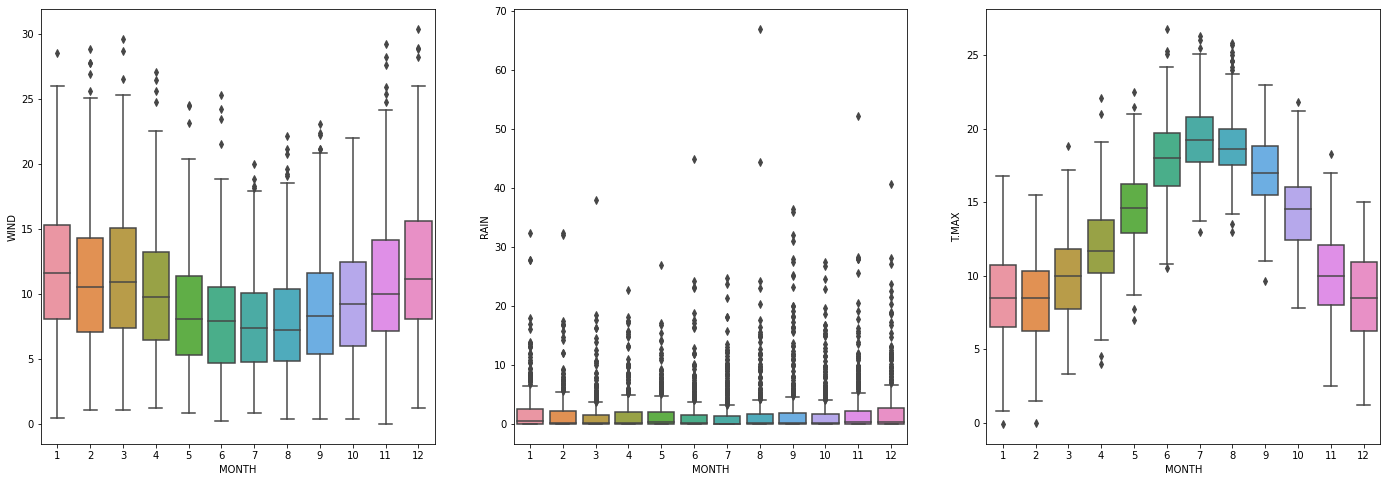

In [108]:
fig, ax = plt.subplots(1, 3, figsize=(24,8))
sns.boxplot(x='MONTH', y='WIND', data=X_time_train.join(y_time_train), ax=ax[0])
sns.boxplot(x='MONTH', y='RAIN', data=X_time_train.join(y_time_train), ax=ax[1])
sns.boxplot(x='MONTH', y='T.MAX', data=X_time_train.join(y_time_train), ax=ax[2])

plt.show()

In [109]:
from statsmodels.tsa.deterministic import DeterministicProcess
dp = DeterministicProcess(
    index=X_time_train.DATE,
    constant=True,
    order=1,
    drop=True,
)
_ = dp.in_sample()
_.head()

,const,trend
DATE,,
1961-01-02,1.0,1.0
1961-01-03,1.0,2.0
1961-01-04,1.0,3.0
1961-01-05,1.0,4.0
1961-01-06,1.0,5.0


# Pipeline 3

In [110]:
# from sklearn.impute import SimpleImputer
# from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer
# from sklearn.pipeline import Pipeline, make_pipeline
# from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder

from sklearn.base import BaseEstimator, TransformerMixin

pipeline steps:
* make sure X & y are aligned and ordered by date
* create timestep and lag features
    * WINDLAG & RAINLAG
* drop unknown lag
* impute categories & encode
* impute numerics & encode


In [111]:
def align_sets(X, y, sortby='DATE'):
    col_cut = X.shape[1]
    df = X.join(y)
    df.sort_values(by=sortby, inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df.iloc[:, 0:col_cut], df.iloc[:, col_cut:]

In [112]:
def align_sort_training(df, target_labels='WIND', sortby='DATE'):
    df.sort_values(by=sortby, inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df.drop(target_labels, axis=1), df.loc[:, target_labels]

In [113]:
X_train, y_train = align_sort_training(train_set)

In [114]:
cat_list = ['IND', 'IND.1', 'IND.2']
num_list = ['RAIN', 'T.MAX', 'T.MIN', 'T.MIN.G']

In [115]:
class LagFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, lag=1):
        self.lag = lag
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None, drop=False):        
        X['RAINLAG'] = X['RAIN'].shift(1)
        # X['DAYSTEP'] = pd.Series(np.arange(len(X)), name='DAYSTEP')
        if drop == True:
            X = X.drop(['RAIN', 'DATE'], axis=1)
        return X
    

pretrans_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    FunctionTransformer(fourth_root, feature_names_out='one-to-one'),
    MinMaxScaler()
)
cat_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='infrequent_if_exist')
)
num_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    MinMaxScaler()
)
preprocessing3 = ColumnTransformer([
    ('Adjust_dist', pretrans_pipeline, ['RAIN', 'RAINLAG']),
    ('num', num_pipeline, num_list[1:]),
    ('cat', cat_pipeline, cat_list)
], remainder='drop')

## SGD

In [116]:
sgd_reg = make_pipeline(LagFeatures(lag=1), preprocessing3, SGDRegressor(random_state=7))
sgd_reg.fit(X_train, y_train)

Pipeline(steps=[('lagfeatures', LagFeatures()),
                ('columntransformer',
                 ColumnTransformer(transformers=[('Adjust_dist',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<function fourth_root at 0x000002AD9DFD6B90>)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['RAIN', 'RAI...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['T.MAX', 'T.MIN',
                                                   'T.MIN.G']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='infrequent_if_exist'))]),
                                                  ['IND', 'IND.1', 'IND.2'])])),
                ('sgdregressor', SGDRegressor(random_state=7))])

In [117]:
sgd_nmae = -cross_val_score(sgd_reg, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print(f'{sgd_nmae} \nMean: {sgd_nmae.mean()}')

[3.70208267 3.96035389 3.60453964 3.39663547 3.54903442] 
Mean: 3.642529218927553


In [118]:
# joblib.dump(sgd_reg, 'Models/sgd.pkl')

## DTree

In [119]:
param_grid = [
    {
        'decisiontreeregressor__criterion':['absolute_error'],
        'decisiontreeregressor__splitter':['best'],
        # 'decisiontreeregressor__max_depth':[],
        'decisiontreeregressor__min_samples_split':[2,3,4,8],
        'decisiontreeregressor__min_samples_leaf':[1,2,3,4,5],
        'decisiontreeregressor__max_features':[None, 'sqrt', 3, 4, 8, 12, 17],
    },
]
# pca = PCA()
tree_pipe = make_pipeline(LagFeatures(), preprocessing3, DecisionTreeRegressor(random_state=7))
tree_gridsearch = GridSearchCV(tree_pipe, param_grid, cv=3, n_jobs=4, scoring='neg_mean_absolute_error')
tree_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('lagfeatures', LagFeatures()),
                                       ('columntransformer',
                                        ColumnTransformer(transformers=[('Adjust_dist',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out='one-to-one',
                                                                                                              func=<function fourth_root at 0x000002AD9DFD6B90>)),
                                                                                         ('minmaxscaler',
                                                                                          Mi...
                                        DecisionTreeRegressor(random_state=7))]),
             n_jobs=4,
             param_grid=[{'decisiontreeregressor__criterion': ['absolute_error'],
                          'decisiontreeregressor__max_features': [None, 'sqrt',
                                                                  3, 4, 8, 12,
                                                                  17],
                          'decisiontreeregressor__min_samples_leaf': [1, 2, 3,
                                                                      4, 5],
                          'decisiontreeregressor__min_samples_split': [2, 3, 4,
                                                                       8],
                          'decisiontreeregressor__splitter': ['best']}],
             scoring='neg_mean_absolute_error')

In [120]:
tree_nmae = -cross_val_score(tree_gridsearch.best_estimator_, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print(f'{tree_nmae}\nMean: {tree_nmae.mean()}')

[3.8566635  4.18405418 3.69111217 3.85784221 3.92481922]
Mean: 3.9028982546045228


In [121]:
# joblib.dump(tree_gridsearch.best_estimator_, 'Models/tree_n250.pkl')

## RForest

### Plain

In [122]:
rforest_reg = make_pipeline(LagFeatures(lag=1), preprocessing3, RandomForestRegressor())
rforest_reg.fit(X_train, y_train)

Pipeline(steps=[('lagfeatures', LagFeatures()),
                ('columntransformer',
                 ColumnTransformer(transformers=[('Adjust_dist',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<function fourth_root at 0x000002AD9DFD6B90>)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['RAIN', 'RAI...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['T.MAX', 'T.MIN',
                                                   'T.MIN.G']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='infrequent_if_exist'))]),
                                                  ['IND', 'IND.1', 'IND.2'])])),
                ('randomforestregressor', RandomForestRegressor())])

In [123]:
rforest_nmae = -cross_val_score(rforest_reg, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
rforest_nmae

array([3.59345688, 4.00450017, 3.5703007 , 3.44236083, 3.68263882])

### ParamSearch

In [124]:
param_grid = [
    {
        # 'pca__n_components':[0.9, 0.95, 0.98],
        'randomforestregressor__n_estimators':[50,100,150,200,250],
        'randomforestregressor__min_samples_split':[2,3,4,8],
        'randomforestregressor__min_samples_leaf':[1,2,3,4,5],
        'randomforestregressor__random_state':[7],
    },
    {
        # 'pca__n_components':[3, 4, 6, 8, 12, 16, 17],
        'randomforestregressor__n_estimators':[50,100,150,200,250],
        'randomforestregressor__min_samples_split':[2,3,4,8],
        'randomforestregressor__min_samples_leaf':[1,2,3,4,5],
        'randomforestregressor__random_state':[7],
    },
]
pca = PCA()
rforest_pipe = make_pipeline(LagFeatures(), preprocessing3, RandomForestRegressor(random_state=7))
rforest_gridsearch = GridSearchCV(rforest_pipe, param_grid, cv=3, n_jobs=6, scoring='neg_mean_absolute_error')
rforest_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('lagfeatures', LagFeatures()),
                                       ('columntransformer',
                                        ColumnTransformer(transformers=[('Adjust_dist',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out='one-to-one',
                                                                                                              func=<function fourth_root at 0x000002AD9DFD6B90>)),
                                                                                         ('minmaxscaler',
                                                                                          Mi...
                                                                       8],
                          'randomforestregressor__n_estimators': [50, 100, 150,
                                                                  200, 250],
                          'randomforestregressor__random_state': [7]},
                         {'randomforestregressor__min_samples_leaf': [1, 2, 3,
                                                                      4, 5],
                          'randomforestregressor__min_samples_split': [2, 3, 4,
                                                                       8],
                          'randomforestregressor__n_estimators': [50, 100, 150,
                                                                  200, 250],
                          'randomforestregressor__random_state': [7]}],
             scoring='neg_mean_absolute_error')

In [125]:
pd.Series(rforest_gridsearch.best_estimator_['randomforestregressor'].feature_importances_, index=rforest_gridsearch.best_estimator_[1:-1].get_feature_names_out())

Adjust_dist__RAIN       0.199862
Adjust_dist__RAINLAG    0.167760
num__T.MAX              0.248265
num__T.MIN              0.150276
num__T.MIN.G            0.218796
cat__IND_0.0            0.003322
cat__IND_1.0            0.000000
cat__IND_4.0            0.003094
cat__IND.1_0.0          0.002157
cat__IND.1_1.0          0.000000
cat__IND.1_2.0          0.000000
cat__IND.1_4.0          0.001546
cat__IND.2_0.0          0.002775
cat__IND.2_1.0          0.000403
cat__IND.2_2.0          0.000000
cat__IND.2_3.0          0.000000
cat__IND.2_4.0          0.001744
dtype: float64

In [126]:
rforest_grid_nmae = -cross_val_score(rforest_gridsearch.best_estimator_, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print(f'{rforest_grid_nmae} \nMean:{rforest_grid_nmae.mean()}')

[3.53515846 3.94397729 3.46733296 3.34683047 3.60057524] 
Mean:3.5787748832335415


In [127]:
# joblib.dump(rforest_gridsearch.best_estimator_, 'Models/rforest_n250.pkl')

# Test Set

In [128]:
from sklearn.metrics import mean_squared_error

In [129]:
X_test, y_test = align_sort_training(test_set)

In [130]:
final_pred = rforest_gridsearch.best_estimator_.predict(X_test)

In [131]:
final_rmse = mean_squared_error(y_test, final_pred, squared=False)

In [132]:
final_rmse

4.500575279758294

### Takeaway
This at first seems like a bad score. However this dataset is not sequential but randomly sampled. To get a true representation of its predictive modeling we would need to have data for recent and predict in the future a desired number of days.

In [139]:
pd.concat([y_test, pd.Series(final_pred)], axis=1)

,WIND,0
0,13.67,11.258760
1,8.04,11.569858
2,3.08,6.485142
3,3.17,9.811215
4,9.25,12.862912
...,...,...
1310,24.54,13.079986
1311,13.21,11.240698
1312,2.46,7.360000
1313,8.71,12.944985


In [165]:
diff = pd.Series(y_test.to_numpy() - final_pred, name='Delta')
pd.concat([y_test, pd.Series(final_pred, name='Prediction'), diff], axis=1).sort_values(by='Delta', ascending=False)

,WIND,Prediction,Delta
1113,25.96,8.967704,16.992296
1023,25.46,9.349376,16.110624
72,25.00,10.121691,14.878309
74,29.54,14.804819,14.735181
213,22.63,8.103309,14.526691
...,...,...,...
701,3.37,14.169380,-10.799380
587,1.63,12.500098,-10.870098
749,2.50,13.735589,-11.235589
1257,1.58,13.017805,-11.437805
